# Bank Marketing Classification

## Importing the modules

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [88]:
import tensorfl

'2.15.1'

## Loading the dataset

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/master/bank-additional-full.csv", sep=';')

In [16]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
# statistical info
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
# find unique values
data.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## Exploratory Data Analysis

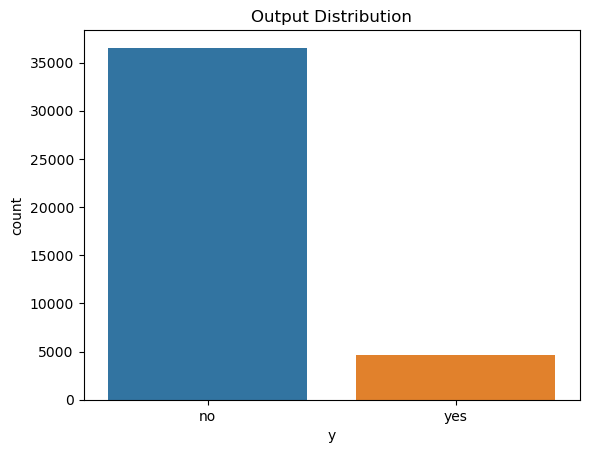

In [20]:
# displaying the distribution of target variable "y"
sns.countplot(x = data["y"])
plt.title("Output Distribution")
plt.show()

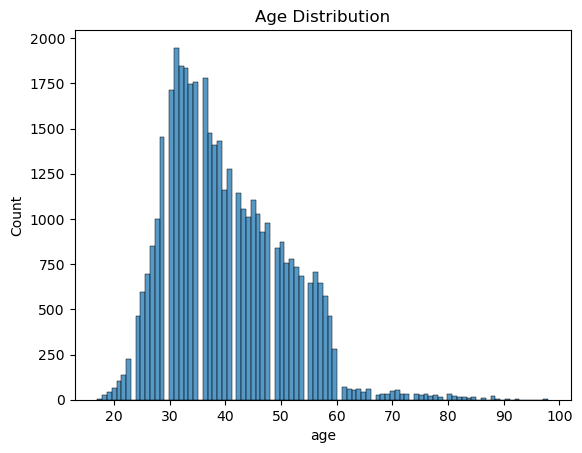

In [21]:
sns.histplot(x = data["age"])
plt.title("Age Distribution")
plt.show()

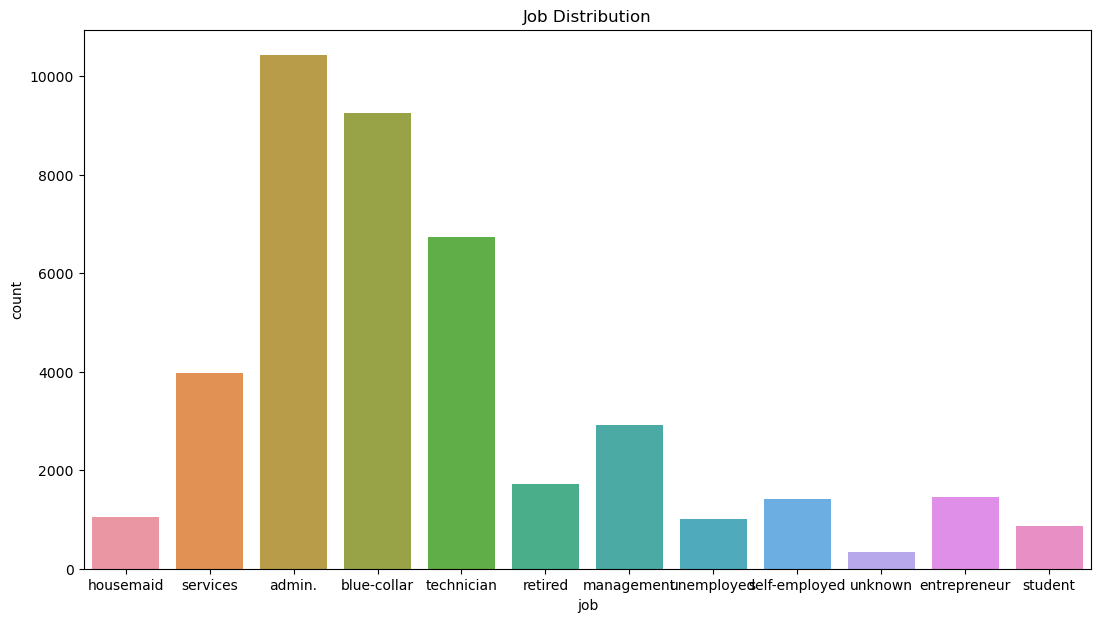

In [22]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["job"])
plt.title("Job Distribution")
plt.show()

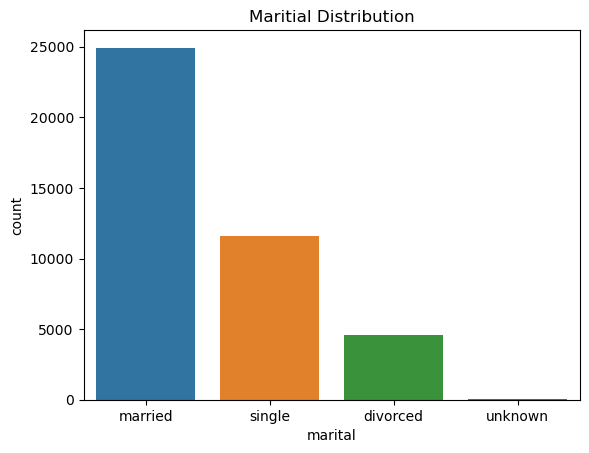

In [23]:
sns.countplot(x = data["marital"])
plt.title("Maritial Distribution")
plt.show()

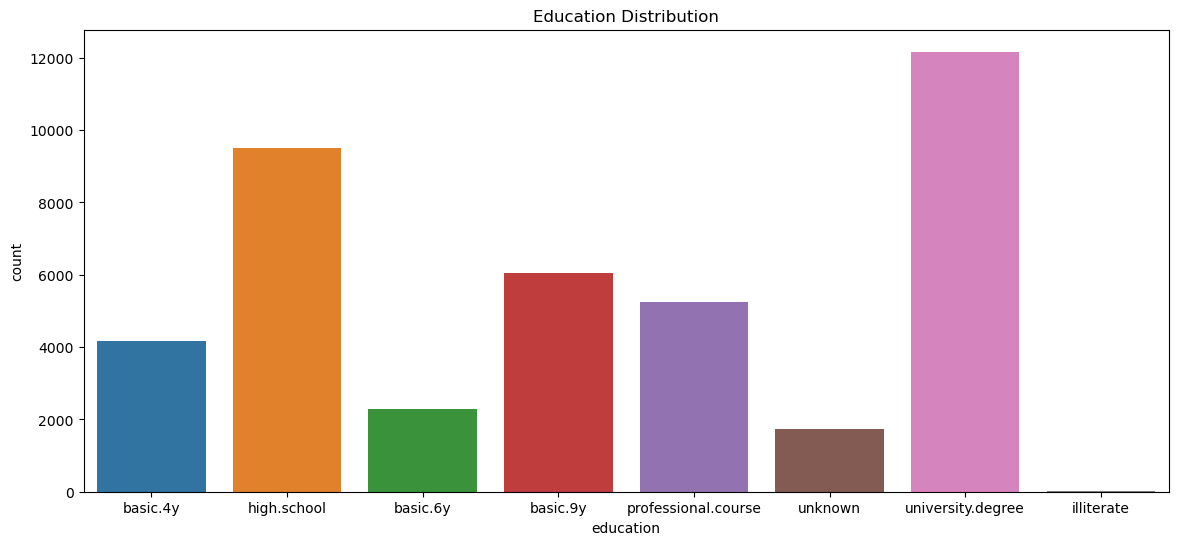

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x = data["education"])
plt.title("Education Distribution")
plt.show()

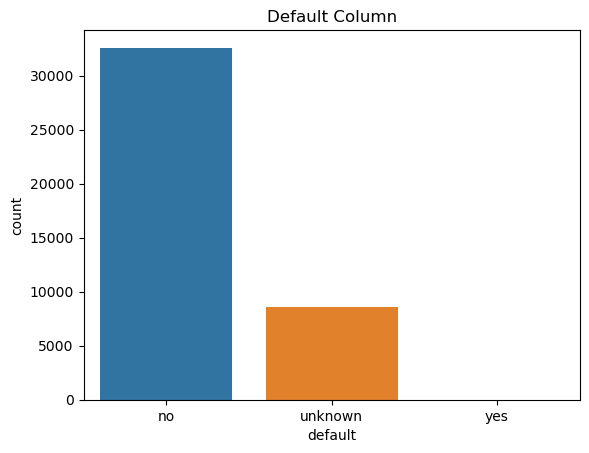

In [25]:
sns.countplot(x = data["default"])
plt.title("Default Column")
plt.show()

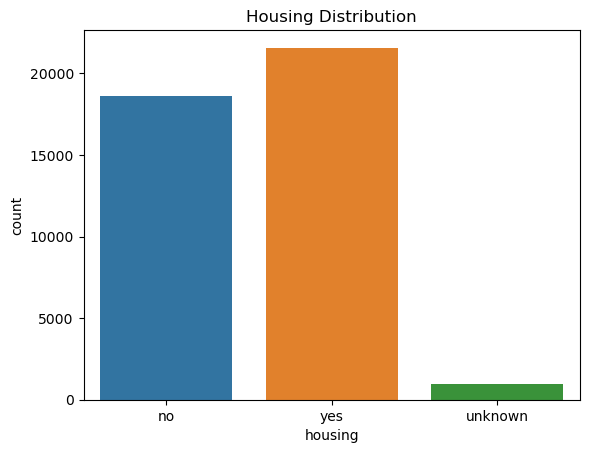

In [26]:
sns.countplot(x = data["housing"])
plt.title("Housing Distribution")
plt.show()

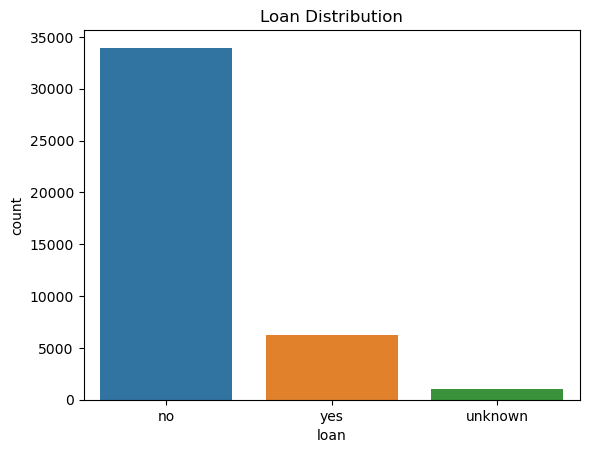

In [27]:
sns.countplot(x = data["loan"])
plt.title("Loan Distribution")
plt.show()

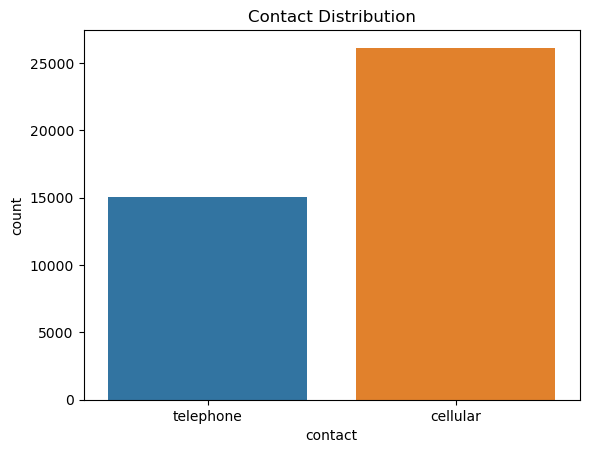

In [28]:
sns.countplot(x = data["contact"])
plt.title("Contact Distribution")
plt.show()

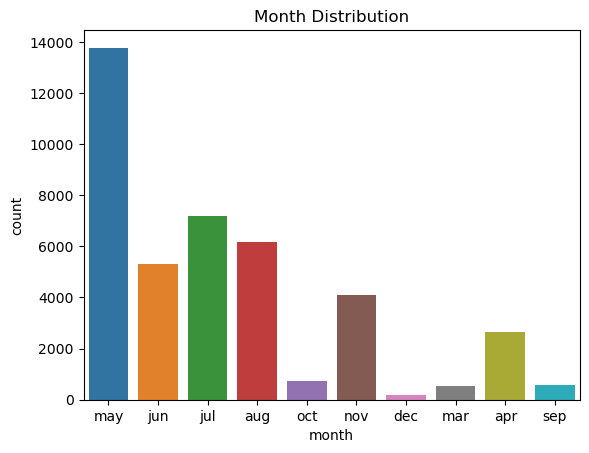

In [29]:
sns.countplot(x = data["month"])
plt.title("Month Distribution")
plt.show()

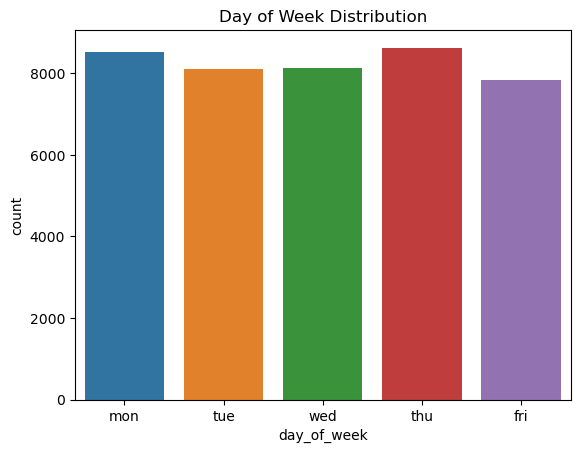

In [30]:
sns.countplot(x = data["day_of_week"])
plt.title("Day of Week Distribution")
plt.show()

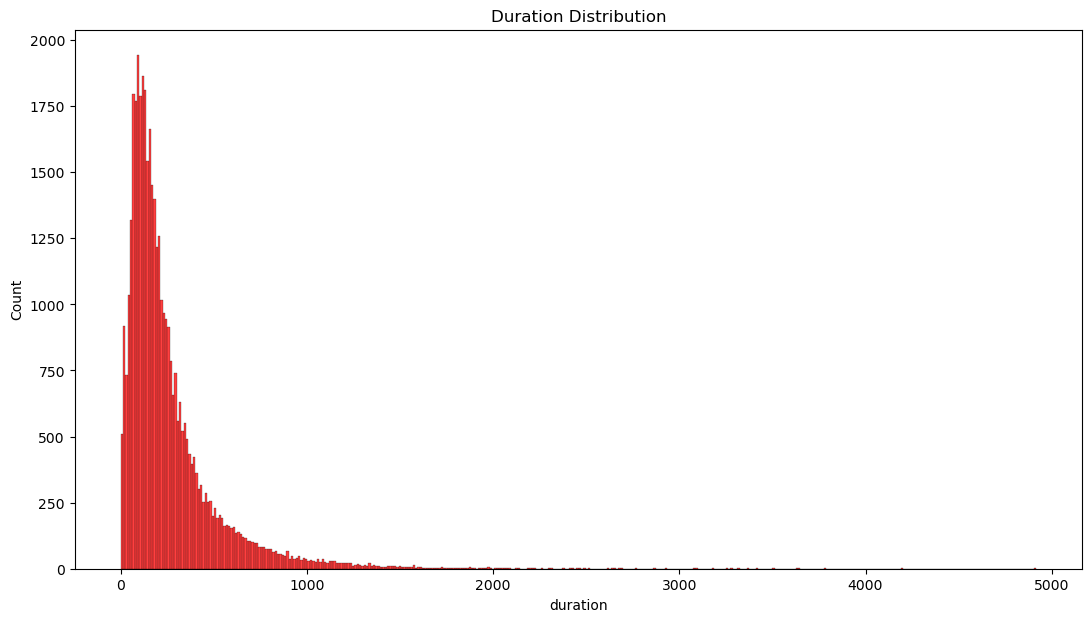

In [31]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["duration"], color = "r")
plt.title("Duration Distribution")
plt.show()

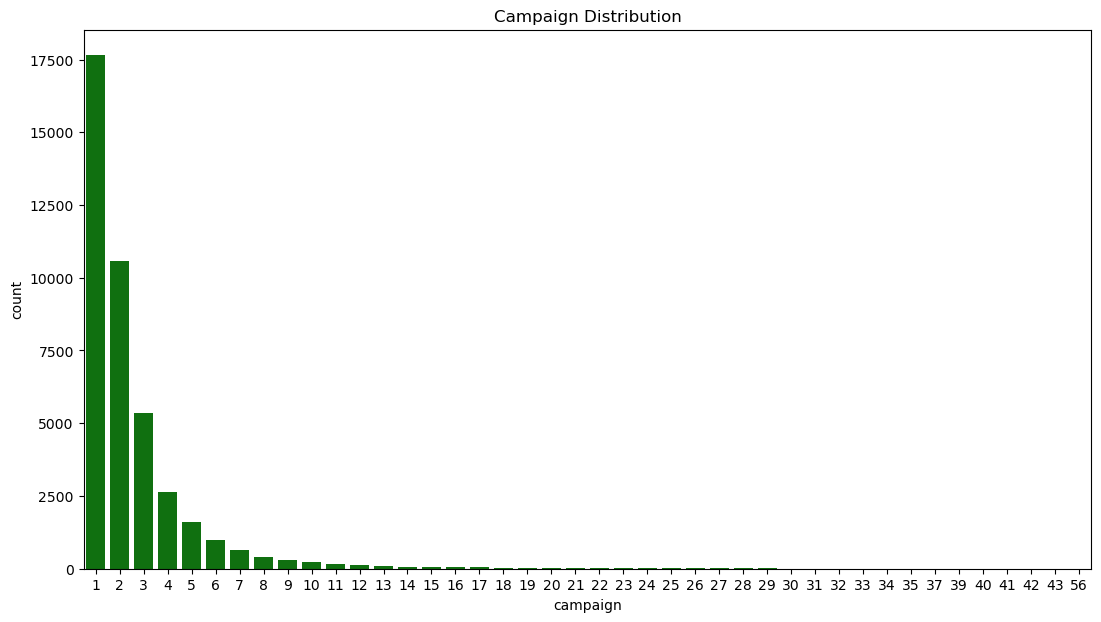

In [32]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["campaign"], color = "g")
plt.title("Campaign Distribution")
plt.show()

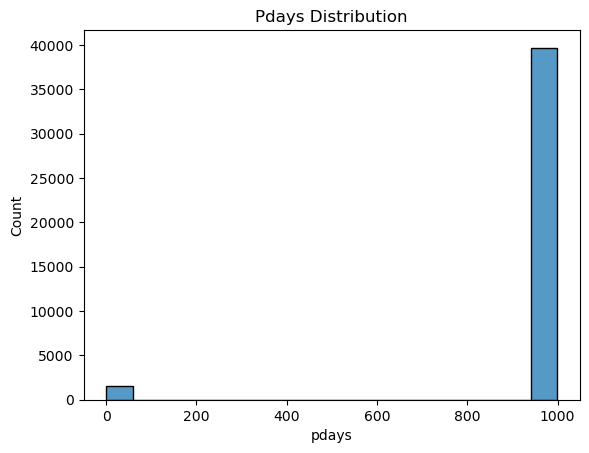

In [33]:
sns.histplot(x = data["pdays"])
plt.title("Pdays Distribution")
plt.show()

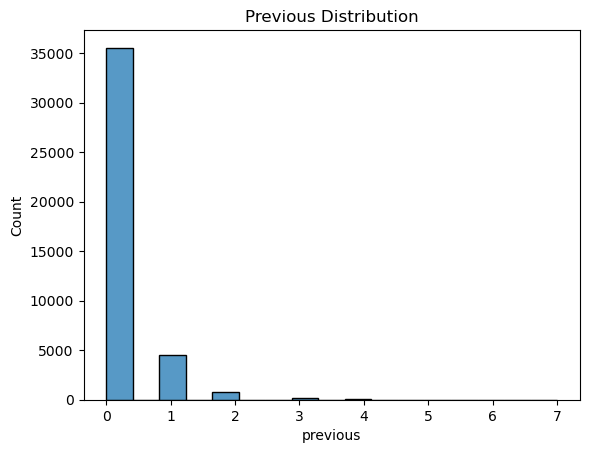

In [34]:
sns.histplot(x = data["previous"])
plt.title("Previous Distribution")
plt.show()

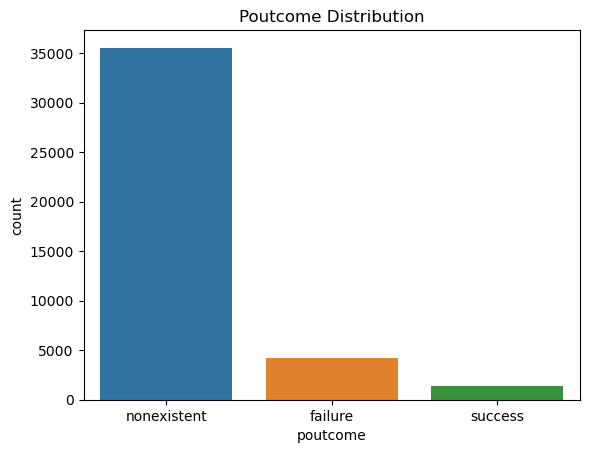

In [35]:
sns.countplot(x = data["poutcome"])
plt.title("Poutcome Distribution")
plt.show()

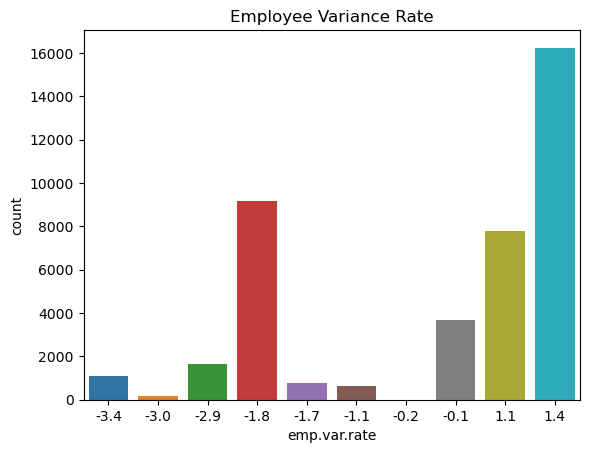

In [36]:
sns.countplot(x = data["emp.var.rate"])
plt.title("Employee Variance Rate")
plt.show()

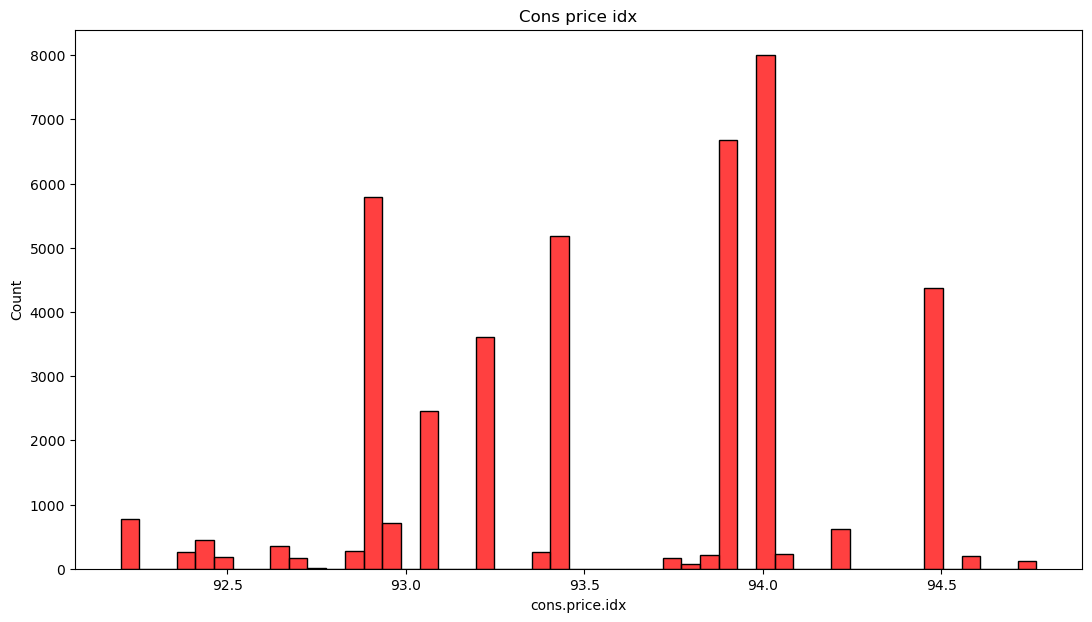

In [37]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.price.idx"], color = "r")
plt.title("Cons price idx")
plt.show()

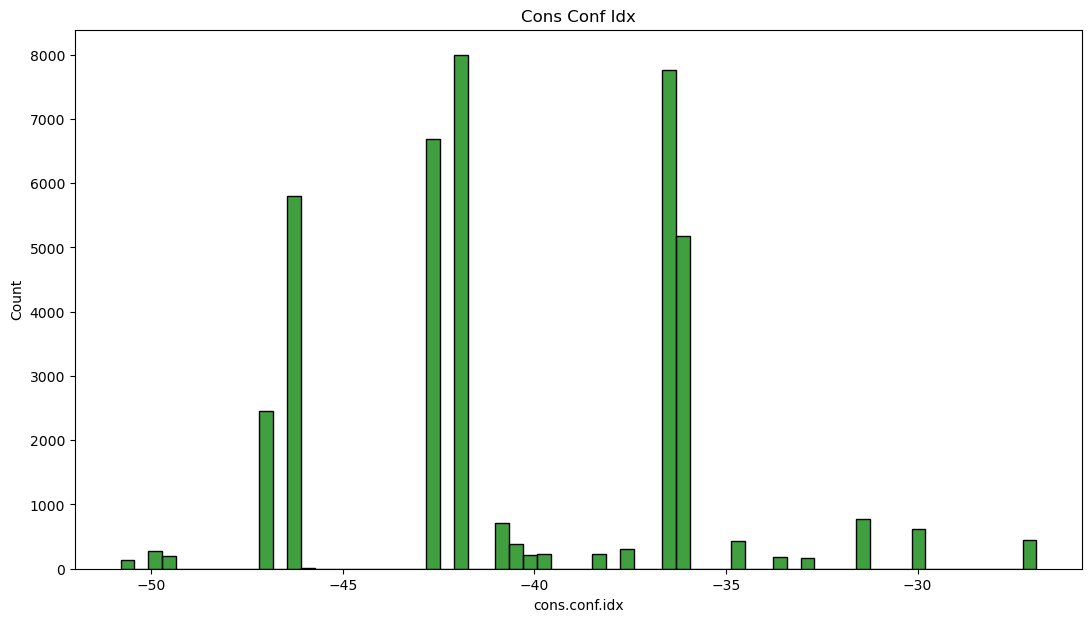

In [38]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.conf.idx"], color = "g")
plt.title("Cons Conf Idx")
plt.show()

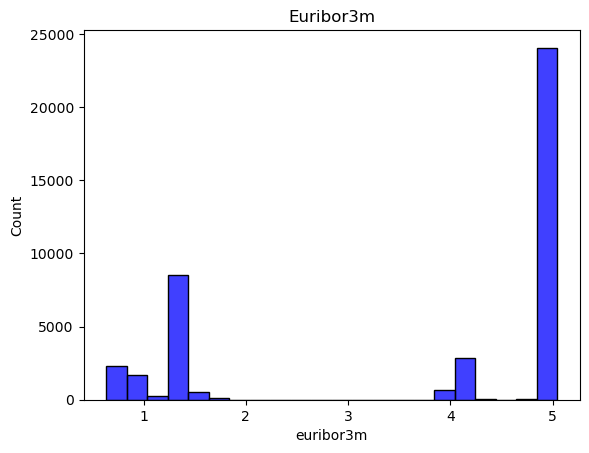

In [39]:
sns.histplot(x = data["euribor3m"], color = "b")
plt.title("Euribor3m")
plt.show()

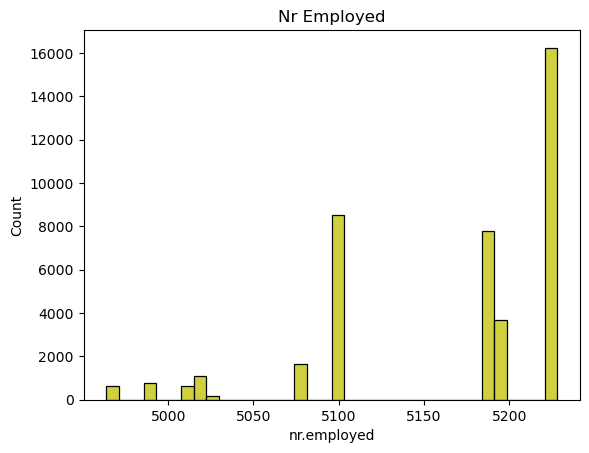

In [40]:
sns.histplot(x = data["nr.employed"], color = "y")
plt.title("Nr Employed")
plt.show()

## Preprocessing the dataset

In [41]:
# check for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [42]:
# check for duplicate values
data.duplicated().any()

True

In [43]:
# dropping the duplicate values
dups = data.duplicated()
data.drop_duplicates(inplace=True)
# reset indices after dropping rows
data=data.reset_index(drop=True)

# check after dropping the duplicate values
data.duplicated().any()

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
# Handling outliers on the numeric columns, by using the Interquartile Method
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in numeric_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    data.loc[data[column] > upper_limit, column] = upper_limit

In [45]:
# encoding values using one hot encoding to improve the metric
# label encoding
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [46]:
# applying logarithmic data transformation to reduce the skewness in some columns

# age, campaign and previous are applied log transformation
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation
columns = ['age', 'duration', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(data[columns])
data['age'] = to_right_skewed[:, 0]
data['duration'] = to_right_skewed[:, 1]
data['campaign'] = to_right_skewed[:, 2]
data['previous'] = to_right_skewed[:, 3]

# nr_employed is applied x² transformation
columns = ['nr.employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(data[columns])
data['nr.employed'] = to_left_skewed[:, 0]

In [47]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,3,1,0,0,0,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
1,4.060443,7,1,3,1,0,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
2,3.637586,7,1,3,0,2,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
3,3.713572,0,1,1,0,0,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
4,4.043051,7,1,3,0,0,2,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0


In [48]:
# Feature scaling/normalization on the numeric columns with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.476144,3,1,0,0,0,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
1,1.547276,7,1,3,1,0,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
2,-0.182202,7,1,3,0,2,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
3,0.128579,0,1,1,0,0,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
4,1.476144,7,1,3,0,0,2,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0


## Adding New Features

In [49]:
data['totalLoan'] = data['loan'] + data['housing']
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,1.476144,3,1,0,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
1,1.547276,7,1,3,1,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
2,-0.182202,7,1,3,0,2,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2
3,0.128579,0,1,1,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
4,1.476144,7,1,3,0,0,2,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2


## Coorelation Matrix

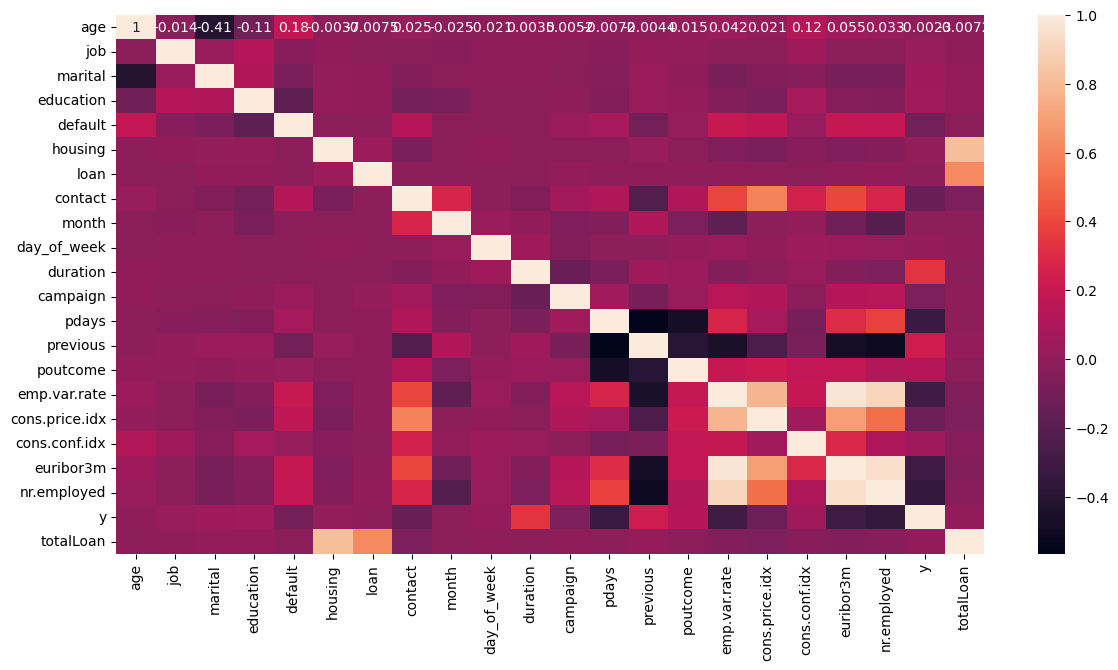

In [50]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)
plt.show()

## Utility Functions for Model Evaluation 

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

In [52]:
def calculate_metrics(y_test, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print("TP: " + str(tp))
    print("TN: " + str(tn))
    print("FP: " + str(fp))
    print("FN: " + str(fn))
    print("")

    recall = tp / (tp + fn) * 100
    precision = tp / (tp + fp) * 100

    print("Recall: " + str(recall) + " %")
    print("Precision: " + str(precision) + " %")

In [53]:
# Function for plotting feature importance.
def plot_feature_importance(model_importance, features, model_name):

    # Create arrays of importance and features
    feature_importance = np.array(model_importance)
    feature_names = np.array(features)

    # Create  Dictionary for storing importance and names
    data={'features':feature_names,'importance':feature_importance}
    f_d = pd.DataFrame(data)

    # Sort by feature importance
    f_d.sort_values(by=['importance'], ascending=False,inplace=True)

    # Modify plot options
    plt.figure(figsize=(10,8))

    sns.barplot(x=f_d['importance'], y=f_d['features'])

    plt.title(model_name + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

## Input Split and Oversampling

In [54]:
X = data.drop(["y"], axis = 1)
y = data["y"]

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,1.476144,3,1,0,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
1,1.547276,7,1,3,1,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
2,-0.182202,7,1,3,0,2,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2
3,0.128579,0,1,1,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
4,1.476144,7,1,3,0,0,2,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [56]:
# Oversampling the "yes" samples
#!pip install imblearn
from imblearn.over_sampling import SMOTE

# Since there are very less "yes" samples, the model is tended to predict the result as "no".
# This results in a very low recall rate. SMOTE is used to increase the number of "yes" samples thus to increase recall rate.
smt = SMOTE(random_state = 42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [57]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,totalLoan
0,1.685933,2,1,2,0,0,0,1,6,2,...,1.235590,0.195443,0.000000,1,0.648101,0.722628,0.886990,0.714192,0.327859,0
1,-0.885067,1,1,2,0,2,0,0,6,2,...,-0.951256,0.195443,0.000000,1,-1.198017,-1.179479,-1.231373,-1.322805,-0.947979,2
2,-0.759212,0,2,6,0,1,1,0,1,3,...,-0.951256,0.195443,0.000000,1,0.839079,-0.227562,0.951838,0.773578,0.849372,2
3,0.323377,0,0,3,0,1,1,0,7,1,...,0.016439,0.195443,0.693147,0,-0.115810,-0.649100,-0.323503,0.328472,0.395123,2
4,0.509318,10,1,2,0,2,0,0,6,4,...,0.016439,0.195443,0.000000,1,-1.198017,-1.179479,-1.231373,-1.318769,-0.947979,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51211,-0.512057,9,1,4,0,0,0,0,1,1,...,0.016439,0.195443,0.000000,1,0.839079,-0.227562,0.951838,0.773578,0.849372,0
51212,-0.563439,9,1,5,0,2,0,0,6,1,...,-0.584905,0.195443,0.430734,0,-1.198017,-1.179479,-1.231373,-1.350954,-0.947979,2
51213,-1.431209,1,2,2,0,2,2,0,6,2,...,0.920430,0.195443,0.000000,1,-1.198017,-1.179479,-1.231373,-1.352906,-0.947979,4
51214,2.086357,5,0,0,0,2,0,0,7,4,...,-0.951256,0.195443,0.000000,1,-2.216565,-1.601017,2.248794,-1.675377,-2.061723,2


## Model Training and Evaluations

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [59]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.882556828840511
Test score: 0.9062578870361783
TP: 1177
TN: 9266
FP: 1663
FN: 247

Recall: 82.65449438202246 %
Precision: 41.443661971830984 %


In [60]:
model = make_pipeline(PolynomialFeatures(),LogisticRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.8964783713588765
Test score: 0.9043963253088048
TP: 1178
TN: 9322
FP: 1607
FN: 246

Recall: 82.7247191011236 %
Precision: 42.298025134649905 %


In [61]:
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(C=c_values)

grid = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring = 'recall')
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'C': 0.01}


In [62]:
model = make_pipeline(StandardScaler(),LogisticRegression(C = 0.1))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.8819710629516111
Test score: 0.907957669287623
TP: 1175
TN: 9244
FP: 1685
FN: 249

Recall: 82.51404494382022 %
Precision: 41.08391608391608 %


### Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.889636804209277
Test score: 0.8850491777493417
TP: 724
TN: 10181
FP: 748
FN: 700

Recall: 50.84269662921348 %
Precision: 49.184782608695656 %


In [66]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring = 'recall')
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 100, 'min_samples_split': 6}


In [67]:
model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 100, min_samples_split = 6 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.9113206654576993
Test score: 0.9034240100141397
Model Score: 0.9137051728325103
TP: 724
TN: 10563
FP: 366
FN: 700

Recall: 50.84269662921348 %
Precision: 66.42201834862385 %


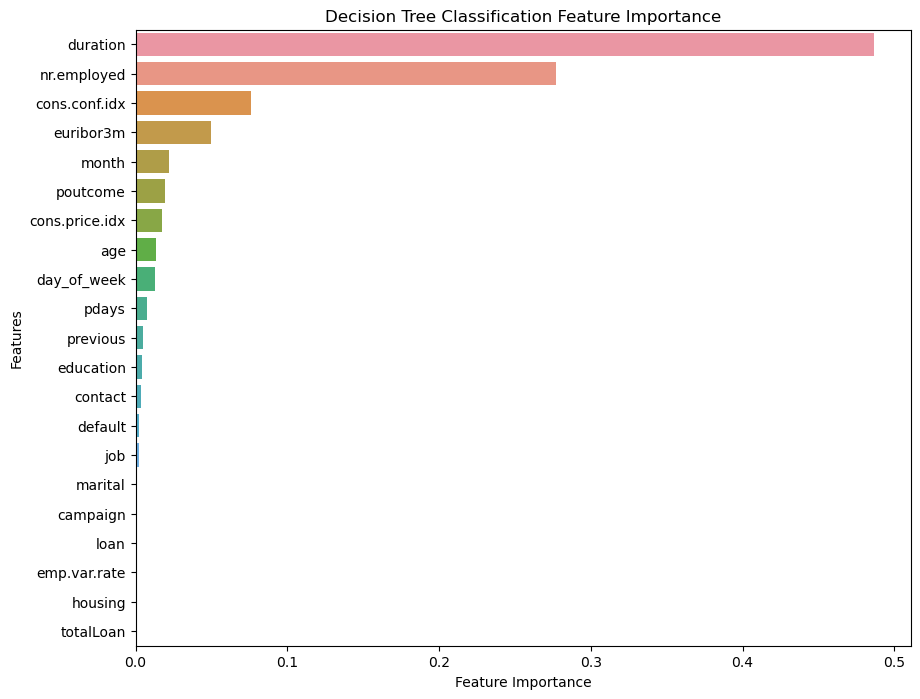

In [68]:
plot_feature_importance(model.feature_importances_,X.columns,'Decision Tree Classification ')

### Random Forest Classification

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
calculate_metrics(y_test, y_pred)

Training score: 0.912916719079997
Test score: 0.9097386198116778
Model Score: 0.9097385250546426
TP: 689
TN: 10549
FP: 380
FN: 735

Recall: 48.38483146067416 %
Precision: 64.45275958840038 %


In [71]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring = 'recall')
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'gini', 'max_leaf_nodes': 350, 'min_samples_split': 9}


In [72]:
model = RandomForestClassifier(criterion = 'gini', max_leaf_nodes = 350, min_samples_split = 9)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test,y_pred)

Training score: 0.9128125705322928
Test score: 0.9124096032192052
TP: 689
TN: 10549
FP: 380
FN: 735

Recall: 48.38483146067416 %
Precision: 64.45275958840038 %


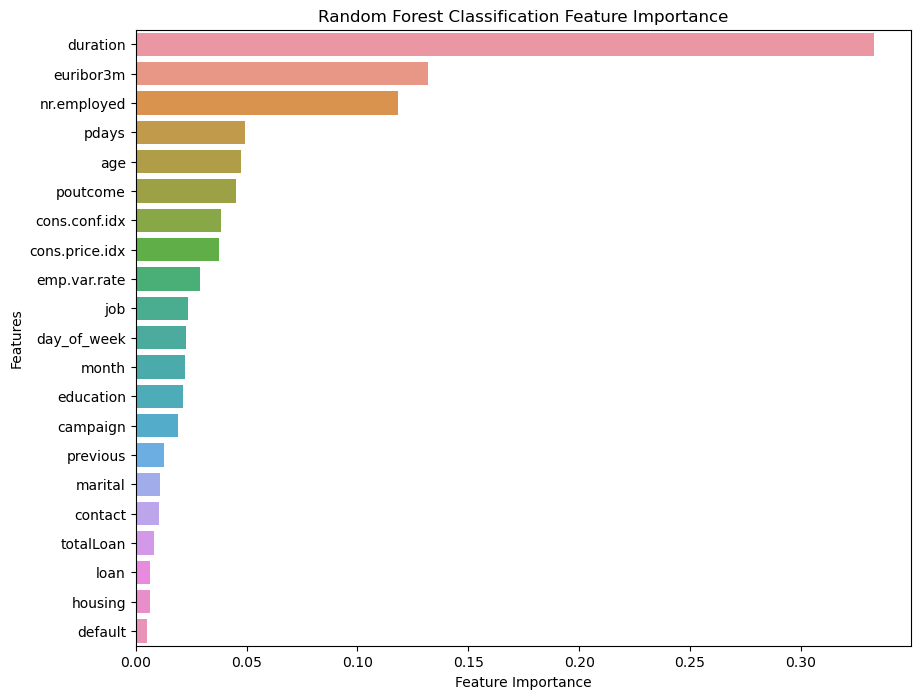

In [73]:
plot_feature_importance(model.feature_importances_,X.columns,'Random Forest Classification ')

### XGBoost Classification

In [48]:
#!pip install xgboost

In [75]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.9105921011054647
Test score: 0.9063386620834063
TP: 689
TN: 10549
FP: 380
FN: 735

Recall: 48.38483146067416 %
Precision: 64.45275958840038 %


In [76]:
param_grid = {"max_depth":range(3,10) }

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 9}


In [77]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth = 9)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.9083718122413064
Test score: 0.9068242954302296
TP: 689
TN: 10549
FP: 380
FN: 735

Recall: 48.38483146067416 %
Precision: 64.45275958840038 %


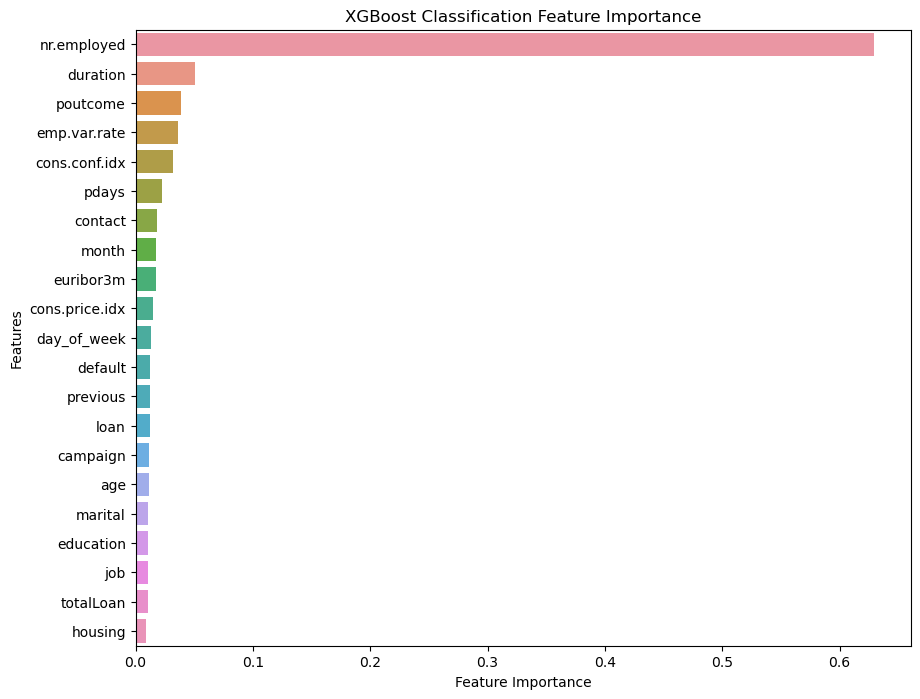

In [78]:
plot_feature_importance(model.feature_importances_,X.columns,'XGBoost Classification ')

### LightGBM

In [81]:
#!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 825.8 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 1.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.5 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.7 MB/s eta 0:00:00


In [83]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
calculate_metrics(y_test, y_pred)

[LightGBM] [Info] Number of positive: 3215, number of negative: 25608
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 28823, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111543 -> initscore=-2.075077
[LightGBM] [Info] Start training from score -2.075077
[LightGBM] [Info] Number of positive: 2572, number of negative: 20486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 23058, number of used features: 21
[LightGBM] [Info] [bin

In [87]:
param_grid = {"num_leaves":range(100,700, 100) }

grid = GridSearchCV(LGBMClassifier(verbose= -100), param_grid, cv=5, scoring = 'recall')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'num_leaves': 300}


In [88]:
model = LGBMClassifier(num_leaves = 300)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
calculate_metrics(y_test, y_pred)

Training score: 0.9106268233067887
Test score: 0.907229088192261
TP: 689
TN: 10549
FP: 380
FN: 735

Recall: 48.38483146067416 %
Precision: 64.45275958840038 %


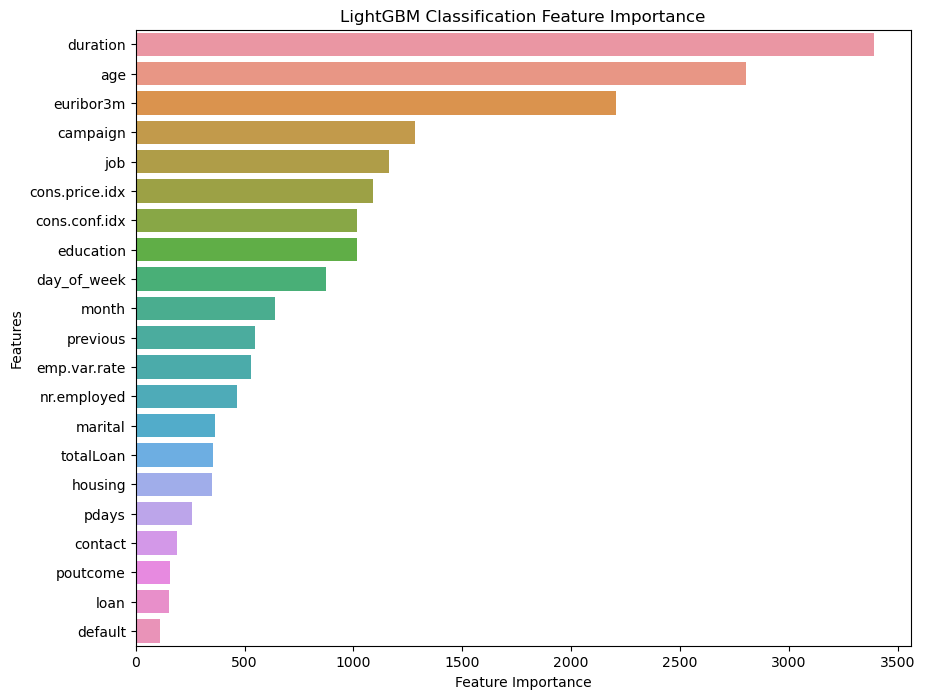

In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'LightGBM Classification ')

# ANN Classification

In [13]:
import tensorflow as tf
tf.__version__

'2.15.1'

In [63]:
ann = tf.keras.models.Sequential()

In [64]:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [65]:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [66]:
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))

In [67]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [68]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall()])

In [69]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

1601/1601 [==============================] - 10s 4ms/step - loss: 0.3636 - recall: 0.8877
Epoch 2/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2920 - recall: 0.9321
Epoch 3/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2840 - recall: 0.9321
Epoch 4/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2770 - recall: 0.9340
Epoch 5/100
1601/1601 [==============================] - 9s 5ms/step - loss: 0.2689 - recall: 0.9373
Epoch 6/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2618 - recall: 0.9417
Epoch 7/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2572 - recall: 0.9437
Epoch 8/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2532 - recall: 0.9450
Epoch 9/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2494 - recall: 0.9482
Epoch 10/100
1601/1601 [==============================] - 8s 5ms/step - loss: 0.2465 - re

## Model Evaluation

In [71]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

387/387 [==============================] - 1s 1ms/step


In [72]:
calculate_metrics(y_test, y_pred)

TP: 1235
TN: 9427
FP: 1502
FN: 189

Recall: 86.72752808988764 %
Precision: 45.12239678480088 %


In [82]:
ann.save('ann_model.keras')

In [74]:
import pickle
pickle.dump(scaler, open("scaler.sav", "wb"))